In [1]:
%matplotlib inline
import numpy as np
from pylab import plt

In [2]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

## GaitProcessor example notebook

We first need to import the gait time series wrapper and the gait processor

In [1]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor

In [4]:
from pdkit.utils import (butter_lowpass_filter, 
                         crossings_nonzero_pos2neg)

Next we need to load the data into GaitTimeSeries.
The data format this wrapper is expecting has to have the following structure:

````

This wrapper will make a the necessary checks and let us know if anything is wrong with our data

In [5]:
ts = GaitTimeSeries().load_data('../tests/data/cloudupdrs_gait.csv')

Sampling rate is 46.916666666666664 Hz


We can now instanciate the GaitProcessor and start extracting those sweet, sweet gait features from accelerometer data

In [14]:
gp = GaitProcessor(duration=ts.td[-1], distance=90)

We can now extract some coarse gait metrics

In [15]:
igait_features = gp.gait(ts.mag_sum_acc)

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/opt/conda/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


We have all the gait features extracted, now we need create a helper function that will help with the visualisation of these features.

In [17]:
def  print_gait_features(igait_features):
    igait_features_names = ["number_of_steps",
                            "cadence",
                            "velocity",
                            "avg_step_length",
                            "avg_stride_length",
                            "step_durations",
                            "avg_step_duration",
                            "sd_step_durations",
                            "strides",
                            "stride_durations",
                            "avg_number_of_strides",
                            "avg_stride_duration",
                            "sd_stride_durations",
                            "step_regularity",
                            "stride_regularity",
                            "symmetry"]
    
    plots = []
    
    for f, n in zip(igait_features, igait_features_names):
        
        
        if isinstance(f, (int, float)):
            print(n, '\t\t',f)
            
        else:
            if any(isinstance(el, (int, float)) for el in f):
                plots.append([f, '{}'.format(n)])
            else:
                for i in range(len(f)):
                    plots.append([f[i], '{} {}'.format(n, i)])
        
    for p in plots:
        plt.plot(p[0], label=p[1])
        plt.legend()
        plt.show()
                


number_of_steps 		 15
cadence 		 0.6448210466838401
velocity 		 3.868926280103041
avg_step_length 		 0.16666666666666666
avg_stride_length 		 0.08333333333333333
avg_step_duration 		 0.59
sd_step_durations 		 0.1765543218712829
avg_number_of_strides 		 7.5
avg_stride_duration 		 1.1508333333333334
sd_stride_durations 		 0.20116910417216766
step_regularity 		 0.5350804944911223
stride_regularity 		 0.822001326219762
symmetry 		 0.2869208317286397


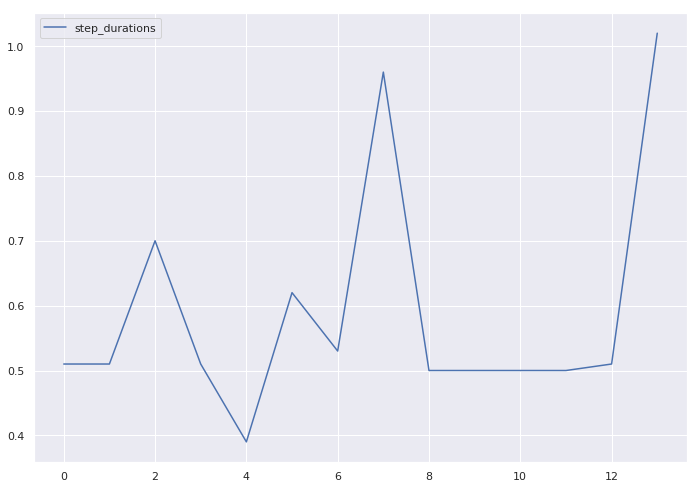

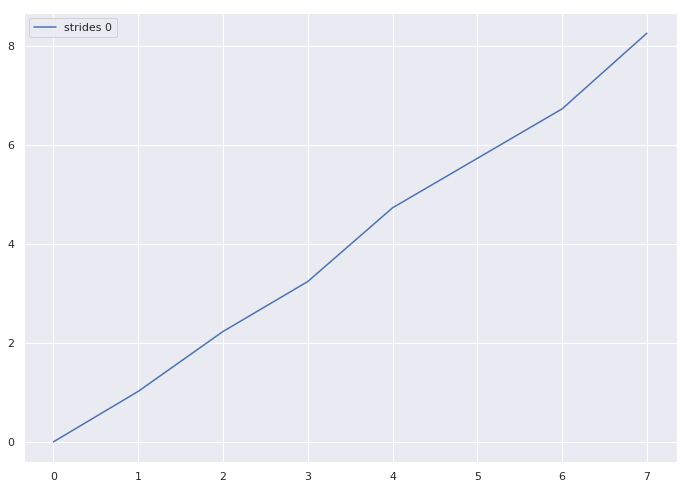

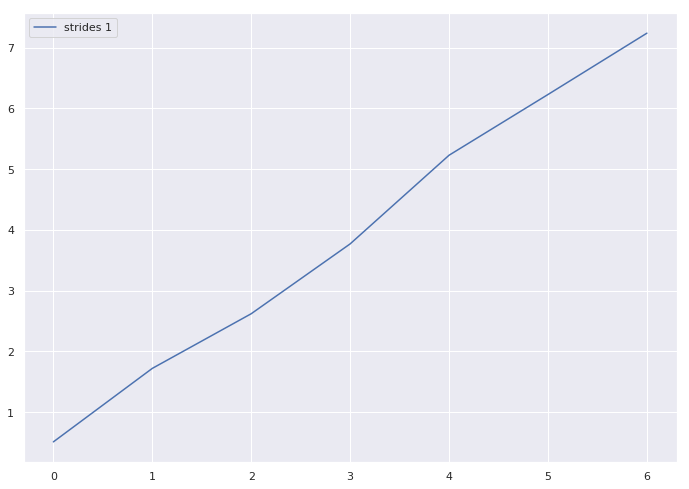

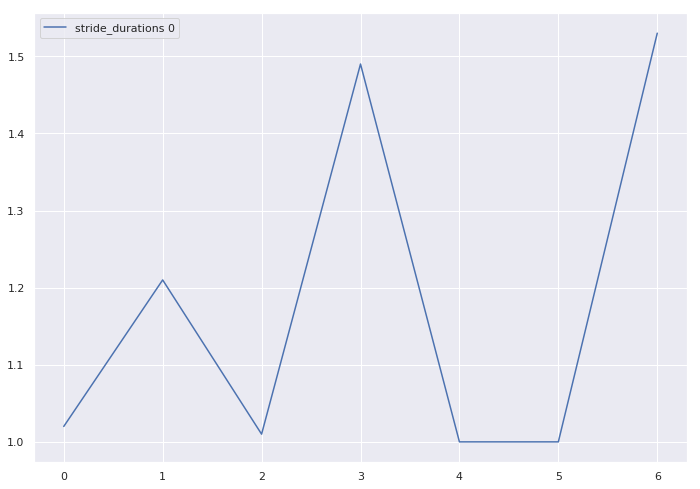

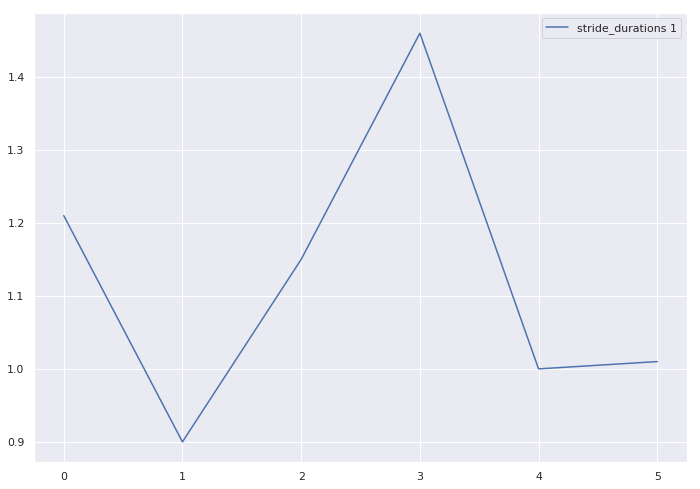

In [18]:
print_gait_features(igait_features)

Let's have a look at heel strikes

In [19]:
# extract heel strikes from x-axis
strikes, strike_indices = gp.heel_strikes(ts.x)

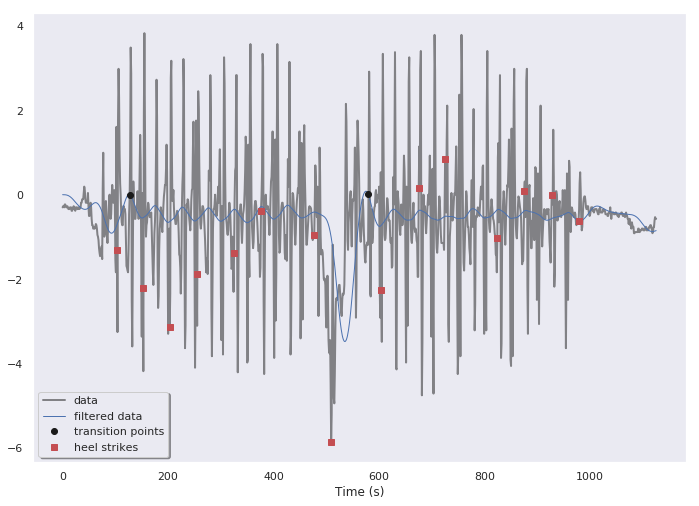

In [20]:
# get the data for the heel strikes (x-axis) for plotting
data = ts.z.values
filtered = butter_lowpass_filter(data, sample_rate=100.0, cutoff=2.0, order=4)
tplot = np.linspace(0, np.size(data), np.size(data))

# Find transitional positions where AP accelerometer changes from
# positive to negative.
transitions = crossings_nonzero_pos2neg(filtered)

plt.plot(tplot, data, 'k-', linewidth=2, label='data', alpha=0.5)
plt.plot(tplot, filtered, 'b-', linewidth=1, label='filtered data')

plt.plot(tplot[transitions], filtered[transitions],
         'ko', linewidth=1, label='transition points')

plt.plot(tplot[strike_indices], data[strike_indices],
         'rs', linewidth=1, label='heel strikes')

plt.xlabel('Time (s)')
plt.grid()
plt.legend(loc='lower left', shadow=True)
plt.show()